# <font color=red>__Démarche d'exploration et de visualisation des données__ </font>
## Exploration des données

Dans cette démonstration, on va explorer et analyser un dataset contenant les iformations des politiciens depuis 1980.
On va utiliser la bibliothéque pandas pour manipuler un fichier __CSV__ contenant ces données. 

In [ ]:
import pandas as pd
import numpy as np

Notre dataset est donné sous forme de fichier CSV. Pandas fournit un moyen facile de lire notre fichier avec `read_csv`. Le chemin du fichier à lire est relatif à notre fichier sur le disque. Le chemin peut également être une URL, supportant HTTP, FTP et S3 si vos données sont stockées dans un seau AWS S3!

In [24]:
affairs = pd.read_csv('affairs.csv',nrows=5)
affairs.tail()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37,10.00,no,3,18,7,4,0
1,female,27,4.00,no,4,14,6,4,0
2,female,32,15.00,yes,1,12,1,4,0
3,male,57,15.00,yes,5,18,6,5,0
4,male,22,0.75,no,2,17,6,3,0


In [23]:
# Des variables sont inexploitables
# Choisir les colonnes utiles
affairs=pd.read_csv('affairs.csv',
    usecols=[1,2,4,6,8],nrows=5)
affairs.tail()

,age,ym,religious,occupation,nbaffairs
0,37,10.00,3,7,0
1,27,4.00,4,6,0
2,32,15.00,1,1,0
3,57,15.00,5,6,0
4,22,0.75,2,6,0


il est également possible  de laisser "tomber" les variable inexploitables:

In [14]:
df = affairs.drop(["nbaffairs", "rate"], axis=1)

df.head()

,sex,age,ym,child,religious,education,occupation
0,male,37,10.00,no,3,18,7
1,female,27,4.00,no,4,14,6
2,female,32,15.00,yes,1,12,1
3,male,57,15.00,yes,5,18,6
4,male,22,0.75,no,2,17,6


La première chose que nous allons vérifier est la taille de notre dataset. Nous pouvons utiliser `info ()` pour obtenir le nombre d'entrées de chaque colonne.

In [5]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
sex           601 non-null object
age           601 non-null float64
ym            601 non-null float64
child         601 non-null object
religious     601 non-null int64
education     601 non-null int64
occupation    601 non-null int64
rate          601 non-null int64
nbaffairs     601 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 42.3+ KB


In [ ]:
#nous pouvons redéfinir les types des variable lors de la lecture du fichier
df=pd.read_csv('affairs.csv',skiprows=1,header=None,usecols=[1,2,4,5,6],
  names=["sex","age","child","religious","education"],dtype={"sex":object,"age":float,"child":float,"religious":int,"education":object})
#redéfinition des bons types
df["sex"]=pd.Categorical(df["sex"],ordered=False)
df["age"]=pd.Categorical(df["age"],ordered=False)
df.dtypes

sex          category
age          category
child         float64
religious       int64
education      object
dtype: object

Alors, à quoi ressemblent les données. utilisons `head ()`, qui imprimera les 5 premières lign


In [ ]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


## Echantillonnage simple
les fichiers de données sontsouvent trop gros, il reste possible, avant de chercher une configuration matérielle lourde et en première approximation, de tirer un échantillon aléatoire simple selon une distribution uniforme. Un tirage stratifié demanderait plus de travail. Cela suppose de connaître le nombre de ligne du fichier ou une valeur inférieure proche.

In [21]:
N=601  # taille du fichier
n=200  # taille de l'échantillon
lin2skipe=[0] # ne pas lire la première ligne
# ne pas lire N-n lignes tirées aléatoirement
lin2skipe.extend(np.random.choice(np.arange(1,N+1),
    (N-n),replace=False))
df_small=pd.read_csv("affairs.csv",
    skiprows=lin2skipe,header=None, 
    usecols=[1,2,3,4,5,6],
    names=["sex","age","ym","child",
         "religious","education"])
df_small

,sex,age,ym,child,religious,education
0,22.0,0.75,no,2,12,1
1,32.0,15.00,yes,4,16,1
2,27.0,4.00,no,4,14,5
3,37.0,15.00,yes,1,17,5
4,22.0,0.75,no,3,16,5


## Gérer un table de données
 ### Discrétisation d'une variable quantitative

In [ ]:
df["SexQ"]=pd.qcut(df.sex,2,labels=["male","female"])

#Modifier / regrouper des modalités
df["SexQ"]=df["SexQ"].cat.rename_categories(
    ["M","F"])
df["SexQ"].head()

0    F
1    M
2    M
3    F
4    M
Name: SexQ, dtype: category
Categories (2, object): [M < F]

In [7]:
affairs['sex'].head()

0      male
1    female
2    female
3      male
4      male
Name: sex, dtype: object

In [8]:
affairs['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

Nous pouvons utiliser 'describe()' pour visualiser quelques données statistiques

In [9]:
affairs['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

In [10]:
affairs['age'].max()

57.0

In [11]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [12]:
affairs[affairs['sex'] == 'female'].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
8,female,32.0,15.00,yes,4,16,1,2,0


L'instruction ci-dessus renvoie une nouvelle image (pas une copie, la modification de cette donnée modifiera aussi l'original).

In [13]:
affairs[affairs['sex'] == 'female'].describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,30.801587,8.017070,3.107937,15.257143,3.384127,3.939683,1.419048
std,8.646241,5.627237,1.134758,2.023879,1.929094,1.148045,3.309264
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,22.000000,1.500000,2.000000,14.000000,1.000000,3.000000,0.000000
50%,27.000000,7.000000,3.000000,16.000000,4.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,17.000000,5.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


Nous pouvons également créer de nouvelles lignes. Nous allons créer une nouvelle colonne contenant True ou False, que la personne soit inférieure à 30 ou non.

In [ ]:
affairs['below_30'] = affairs['age'] < 30

In [15]:
affairs['below_30'].value_counts()

False    325
True     276
Name: below_30, dtype: int64

In [16]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,3,18,7,4,0,False
1,female,27.0,4.00,no,4,14,6,4,0,True
2,female,32.0,15.00,yes,1,12,1,4,0,False
3,male,57.0,15.00,yes,5,18,6,5,0,False
4,male,22.0,0.75,no,2,17,6,3,0,True


We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [17]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

In [18]:
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [19]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


## 2-Fichier JSON

Dans cette section on va explorer de données d'un fichier JSON, les fichiers de données de grandes tailles peuvent être pénibles pour les charger en mémoire. Dans ce cas, une combinaison d'outils de ligne de commande et de Python peut constituer un moyen efficace d'__explorer__ et d'analyser les données.

On va travailler sur un fichier JSON contenant les données des activités des agents de police concernant les violations de la circulation en Montgomery, Maryland.Les données contiennent des informations sur l'endroit où la violation s'est produite, le type de voiture, les données démographiques sur la personne qui reçoit la violation, et d'autres informations intéressantes.

In [1]:
%%bash

head md_traffic.json

{
  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",


À partir de là, nous pouvons dire que les données JSON sont un dictionnaire et qu'elles sont bien formatées. meta est une clé de niveau supérieur et est indentée de deux espaces. Nous pouvons obtenir toutes les clés de niveau supérieur en utilisant la commande grep pour afficher les lignes qui ont deux espaces principaux:

In [2]:
%%bash

grep -E '^ {2}"' md_traffic.json

  "meta" : {
  "data" : [ [ 2118167, "EE8BC302-660F-48C4-B422-17427ECE821F", 2118167, 1482239054, "498050", 1482239054, "498050", null, "2013-09-24T00:00:00", "17:11:00", "MCP", "3rd district, Silver Spring", "DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION", "8804 FLOWER AVE", null, null, "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "MD", "02 - Automobile", "2008", "FORD", "4S", "BLACK", "Citation", "13-401(h)", "Transportation Article", "No", "BLACK", "M", "TAKOMA PARK", "MD", "MD", "A - Marked Patrol", [ null, null, null, null, null ] ]


Cela nous montre que les méta et les données sont des clés de niveau supérieur dans les données md_traffic.json. Chaque liste interne est un enregistrement et le premier enregistrement apparaît dans la sortie de la commande grep. Voici une vue tronquée de l'apparence des données:

À partir de la commande head, nous savons qu'il y a au moins 3 niveaux de clés, avec des méta contenant une vue clé, qui contient les clés id, name, averageRating et autres. Nous pouvons imprimer la structure de clé complète du fichier JSON en utilisant grep pour imprimer toutes les lignes avec 2-6 espaces principaux:

In [3]:
%%bash
grep -E '^ {2,6}"' md_traffic.json

  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",
      "downloadCount" : 88405,
      "hideFromCatalog" : false,
      "hideFromDataJson" : false,
      "iconUrl" : "fileId:r41tDc239M1FL75LFwXFKzFCWqr8mzMeMTYXiA24USM",
      "indexUpdatedAt" : 1527586589,
      "newBackend" : false,
      "numberOfComments" : 0,
      "oid" : 8890705,
      "provenance" : "official",
      "publicationAppendEnabled" : false,
      "publicationDate" : 1411040702,
      "publicationGroup" : 1620779,
      "publicationStage" : "pu

__Extraire des informations sur les colonnes :__

Maintenant que nous savons quelle clé contient des informations sur les colonnes, nous devons lire ces informations. Puisque nous supposons que le fichier JSON ne rentre pas dans la mémoire, nous ne pouvons pas le lire directement en utilisant la bibliothèque json.

Nous pouvons accomplir cela en utilisant le paquetage ijson. ijson analysera itérativement le fichier json au lieu de tout lire en même temps. 

Pour utiliser ijson, nous spécifions un fichier dont nous voulons extraire des données, puis nous spécifions un chemin de clé pour extraire:

In [7]:
import ijson

filename = "md_traffic.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

Dans le code ci-dessus, nous ouvrons le fichier md_traffic.json, puis nous utilisons la méthode items dans ijson pour extraire une liste du fichier. Nous spécifions le chemin d'accès à la liste en utilisant la notation meta.view.columns. Rappelez-vous que meta est une clé de niveau supérieur, qui contient une vue à l'intérieur, qui contient des colonnes à l'intérieur. Nous spécifions ensuite meta.view.columns.item pour indiquer que nous devons extraire chaque élément individuel dans la liste meta.view.columns. La fonction items retournera un générateur, donc nous utilisons la méthode list pour transformer le générateur en une liste Python. Nous pouvons imprimer le premier élément de la liste:

In [9]:
print(columns[0])

{'renderTypeName': 'meta_data', 'name': 'sid', 'format': {}, 'id': -1, 'fieldName': ':sid', 'dataTypeName': 'meta_data', 'flags': ['hidden'], 'position': 0}


De la sortie ci-dessus, il semble que chaque élément dans les colonnes est un dictionnaire qui contient des informations sur chaque colonne. Pour obtenir notre en-tête, il semble que fieldName soit la clé à extraire. Pour obtenir les noms des colonnes, il suffit d'extraire la clé fieldName de chaque élément dans les colonnes:

In [10]:
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'accident',
 'belts',
 'personal_injury',
 'property_damage',
 'fatal',
 'commercial_license',
 'hazmat',
 'commercial_vehicle',
 'alcohol',
 'work_zone',
 'state',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'charge',
 'article',
 'contributed_to_accident',
 'race',
 'gender',
 'driver_city',
 'driver_state',
 'dl_state',
 'arrest_type',
 'geolocation']

__extraction des données:__

Vous pouvez vous rappeler que les données sont verrouillées dans une liste de listes à l'intérieur de la clé de données. Nous aurons besoin de lire ces données en mémoire pour les manipuler. Heureusement, nous pouvons utiliser les noms de colonnes que nous venons d'extraire pour saisir uniquement les colonnes pertinentes. Cela permettra d'économiser une tonne d'espace. Si l'ensemble de données était plus volumineux, vous pouviez traiter de manière itérative des lots de lignes. Alors lisez dans les 10000000 premières lignes, faites un peu de traitement, puis le prochain 10000000, et ainsi de suite. Dans ce cas, nous pouvons définir les colonnes qui nous intéressent, et encore utiliser ijson pour traiter de façon itérative le fichier JSON:

In [11]:
good_columns = [
    "date_of_stop", 
    "time_of_stop", 
    "agency", 
    "subagency",
    "description",
    "location", 
    "latitude", 
    "longitude", 
    "vehicle_type", 
    "year", 
    "make", 
    "model", 
    "color", 
    "violation_type",
    "race", 
    "gender", 
    "driver_state", 
    "driver_city", 
    "dl_state",
    "arrest_type"
]

data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in good_columns:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)

nous pouvons donc imprimer le premier élément des données:

In [13]:
data[0]

['2013-09-24T00:00:00',
 '17:11:00',
 'MCP',
 '3rd district, Silver Spring',
 'DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION',
 '8804 FLOWER AVE',
 None,
 None,
 '02 - Automobile',
 '2008',
 'FORD',
 '4S',
 'BLACK',
 'Citation',
 'BLACK',
 'M',
 'MD',
 'TAKOMA PARK',
 'MD',
 'A - Marked Patrol']

__Lecture des données en utilisant Pandas:__

Maintenant que nous avons les données sous la forme d'une liste de listes et les en-têtes de colonne sous forme de liste, nous pouvons créer une base de données Pandas pour analyser les données. C'est une bibliothèque d'analyse de données qui utilise une structure de données efficace et tabulaire appelée Dataframe pour représenter vos données. Pandas nous permet de convertir une liste de listes en une Dataframe et de spécifier les noms de colonnes séparément.

In [14]:
import pandas as pd

stops = pd.DataFrame(data, columns=good_columns)

Maintenant que nous avons nos données dans un Dataframe, nous pouvons faire une analyse intéressante. Voici un tableau du nombre d'arrêts effectués par couleur de voiture:

In [15]:
stops["color"].value_counts()

BLACK          4369
SILVER         4093
WHITE          3246
GRAY           2647
RED            1714
BLUE           1621
GREEN           696
GOLD            599
BLUE, DARK      435
TAN             389
MAROON          335
N/A             286
BEIGE           270
BLUE, LIGHT     267
GREEN, DK       209
BROWN           122
GREEN, LGT      111
ORANGE           90
YELLOW           80
PURPLE           44
BRONZE           36
COPPER           18
CREAM            16
MULTICOLOR        7
Name: color, dtype: int64

Le camouflage semble être une couleur de voiture très populaire. Voici une table de quel type d'unité de police a créé la citation:

In [16]:
stops["arrest_type"].value_counts()

A - Marked Patrol                         19112
Q - Marked Laser                           1204
B - Unmarked Patrol                         767
E - Marked Stationary Radar                 127
G - Marked Moving Radar (Stationary)        100
S - License Plate Recognition                77
L - Motorcycle                               69
O - Foot Patrol                              63
F - Unmarked Stationary Radar                51
M - Marked (Off-Duty)                        33
R - Unmarked Laser                           31
I - Marked Moving Radar (Moving)             28
H - Unmarked Moving Radar (Stationary)       23
J - Unmarked Moving Radar (Moving)           13
C - Marked VASCAR                             7
P - Mounted Patrol                            4
D - Unmarked VASCAR                           3
Name: arrest_type, dtype: int64

__Conversion de colonnes:__

Nous sommes maintenant presque prêts à effectuer une analyse basée sur le temps et l'emplacement, mais nous devons d'abord convertir les colonnes de longitude, de latitude et de date des chaînes en flottants. Nous pouvons utiliser le code ci-dessous pour convertir la latitude et la longitude:

In [17]:
import numpy as np

def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
stops["longitude"] = stops["longitude"].apply(parse_float)
stops["latitude"] = stops["latitude"].apply(parse_float)

l'heure du jour et la date de l'arrêt sont stockées dans deux colonnes séparées, time_of_stop et date_of_stop. Nous analyserons les deux et les transformerons en une seule colonne

In [18]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row["date_of_stop"], "%Y-%m-%dT%H:%M:%S")
    time = row["time_of_stop"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date

stops["date"] = stops.apply(parse_full_date, axis=1)


Nous pouvons maintenant faire une parcelle dont les jours entraînent le plus d'arrêts de trafic:

(array([2754., 2752., 3912., 3176., 3222., 5896.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

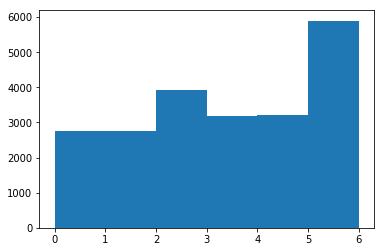

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(stops["date"].dt.weekday, bins=6)


Dans ce plot, lundi est 0, et dimanche est 6. Il semble que le dimanche a le plus d'arrêts, et le lundi a le moins. Cela peut également être un problème de qualité des données lorsque des dates non valides ont été prises dimanche pour une raison quelconque. Nous devons creuser plus profondément dans la colonne date_of_stop pour le comprendre définitivement .
Nous pouvons également tracer les heures d'arrêt de la circulation les plus courantes:

(array([1556., 1263., 1041.,  665.,  319.,  246.,  279.,  509.,  898.,
         910.,  777.,  648.,  749.,  745.,  867.,  743.,  798.,  874.,
         713.,  843., 1011., 1395., 1925., 1938.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

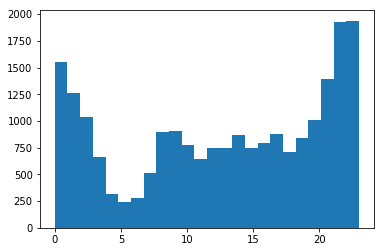

In [20]:
plt.hist(stops["date"].dt.hour, bins=24)


Il semble que la plupart des arrêts se produisent vers minuit, et le plus petit se produit vers 5h du matin. Cela pourrait sembler logique, car les gens rentre chez eux après les dîners tard le soir et peuvent être affaiblis. Cela peut également être un problème de qualité des données.

__Regroupement des arrets:__


Maintenant que nous avons converti les colonnes de localisation et de date, nous pouvons cartographier les arrêts de trafic. Comme le mappage est très intensif en termes de ressources CPU et de mémoire, nous devons d'abord filtrer les lignes que nous utilisons à partir des arrêts:

In [21]:
last_year = stops[stops["date"] > datetime.datetime(year=2015, month=2, day=18)]


Dans le code ci-dessus, nous avons sélectionné toutes les lignes de l'année précédente. Nous pouvons encore réduire cette valeur et sélectionner uniquement les rangées qui se sont produites pendant les heures de pointe, la période du matin où tout le monde va travailler:

In [22]:
morning_rush = last_year[(last_year["date"].dt.weekday < 5) & (last_year["date"].dt.hour > 5) & (last_year["date"].dt.hour < 10)]
print(morning_rush.shape)
last_year.shape

(1804, 21)


(18336, 21)

En utilisant le paquet folium, nous pouvons maintenant visualiser où tous les arrêts se sont produits. Folium vous permet de créer facilement des cartes interactives en Python en tirant parti de la brochure. Afin de préserver les performances, nous ne visualisons que les 1000 premières lignes de morning_rush:

In [32]:
import folium
from folium import plugins

stops_map = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(stops_map)
for name, row in morning_rush.iloc[:1000].iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["description"]).add_to(marker_cluster)
stops_map.create_map('stops.html')
stops_map

AttributeError: module 'folium' has no attribute 'MarkerCluster'

Cela montre que de nombreux arrêts de la circulation sont concentrés dans la partie inférieure droite de la zone. Nous pouvons étendre notre analyse avec un heatmap:

In [31]:
stops_heatmap = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
stops_heatmap.add_children(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in morning_rush.iloc[:1000].iterrows()]))
stops_heatmap.save("heatmap.html")
stops_heatmap

/home/simo/PycharmProjects/pfa_SmartGrids/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  
